In [71]:
import pandas_datareader.data as reader
import datetime as dt
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

**Importing data directly via web from Yahoo finaces for the 5 major cryptocurrencies. This is an active data set since we are using the most current date and shifting back 5 years, making the data set constantly change over time.**

In [72]:
end = dt.datetime.now()
start = dt.date(end.year-5, end.month, end.day)

cryptolist = ['BTC-USD','XRP-USD','LTC-USD','ETH-USD','DOGE-USD']

In [73]:
df = reader.get_data_yahoo(cryptolist,start,end)['Adj Close']
df

Symbols,BTC-USD,XRP-USD,LTC-USD,ETH-USD,DOGE-USD
Date,,,,,
2016-07-31,606.271973,0.005906,3.863420,10.941600,0.000223
2016-08-01,547.465027,0.005690,3.639580,8.787280,0.000206
2016-08-02,566.354980,0.005646,3.719230,10.293900,0.000214
2016-08-03,578.289001,0.005816,3.748450,11.042800,0.000215
2016-08-04,575.043030,0.006447,3.729040,10.925400,0.000218
...,...,...,...,...,...
2021-07-27,39995.906250,0.725445,139.836609,2296.545410,0.205392
2021-07-28,40008.421875,0.748017,141.321289,2380.956787,0.204619
2021-07-29,42235.546875,0.752119,145.775024,2466.961426,0.208821


### Basic Plotting To Look  at Data Set

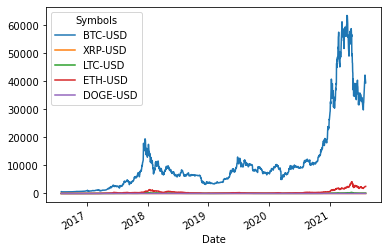

In [74]:
df.plot()
plt.show()

# Check Point 2

**This data cleanup looks into using the adjusted closing prices on crypto and looks at daily relative prices percent change to see how closing prices may shift daily. Crypto is a very volatile asset so looking at the changes on a daily basis will improve our undertsanding of how secure it may be. To compare cryptos we need the returns, not the absolute prices. Then, to visualize how each crypto's prices change over time, we need to accumulate these daily return as seen below.**

In [75]:
#Find the daily return returns by doing a percent change.
daily_return = df.pct_change().dropna(axis = 0)
daily_return

Symbols,BTC-USD,XRP-USD,LTC-USD,ETH-USD,DOGE-USD
Date,,,,,
2016-08-01,-0.096998,-0.036573,-0.057938,-0.196893,-0.076233
2016-08-02,0.034504,-0.007733,0.021884,0.171455,0.038835
2016-08-03,0.021072,0.030110,0.007856,0.072752,0.004673
2016-08-04,-0.005613,0.108494,-0.005178,-0.010631,0.013954
2016-08-05,0.022146,-0.017062,0.008351,-0.004055,0.059633
...,...,...,...,...,...
2021-07-27,0.014946,0.125412,0.038767,-0.000778,-0.002462
2021-07-28,0.000313,0.031115,0.010617,0.036756,-0.003764
2021-07-29,0.055666,0.005484,0.031515,0.036122,0.020536


In [76]:
daily_cum_return = (daily_return + 1).cumprod() - 1
daily_cum_return

Symbols,BTC-USD,XRP-USD,LTC-USD,ETH-USD,DOGE-USD
Date,,,,,
2016-08-01,-0.096998,-0.036573,-0.057938,-0.196893,-0.076233
2016-08-02,-0.065840,-0.044023,-0.037322,-0.059196,-0.040359
2016-08-03,-0.046156,-0.015239,-0.029759,0.009249,-0.035874
2016-08-04,-0.051510,0.091602,-0.034783,-0.001481,-0.022422
2016-08-05,-0.030504,0.072977,-0.026722,-0.005529,0.035874
...,...,...,...,...,...
2021-07-27,64.970238,121.831865,35.195031,208.891190,920.040391
2021-07-28,64.990881,125.653748,35.579323,216.605910,916.574034
2021-07-29,68.664357,126.348295,36.732119,224.466244,935.417053


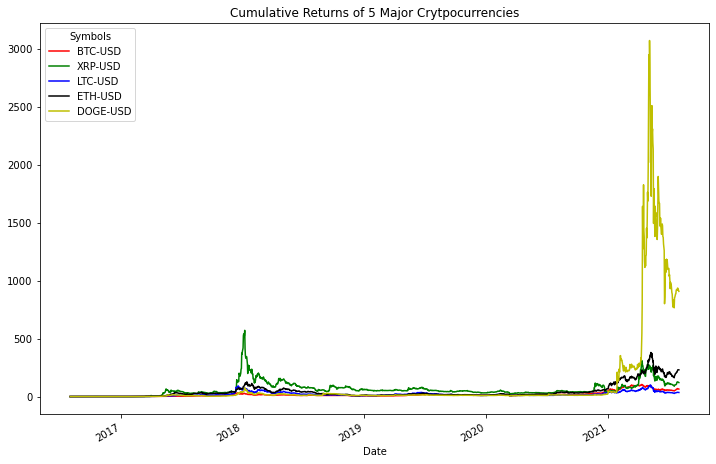

In [77]:
colors = ['r','g','b','k','y']
daily_cum_return.plot(color = colors, figsize = (12,8))
plt.title('Cumulative Returns of 5 Major Crytpocurrencies')
plt.show()


## Check Point 3

**So this is my line+bar chart for checkpoint 3, which will not be shown in my final project as I see that it not the best plot to visualize my data. What my intention is to show the daily returns against the adjusted closing prices. However, not all of them can be represented because percent changes are small and closing prices can be high. The only two which I could visualize side by side is BTC daily returns against DOGE adj closing prices.I, also don't think that line+bar chart visualizes these items correctly since I couldn't get date to show.**

In [85]:
fig = go.Figure()
# Set y axis for the different kinds of crypto either for daily returns or adj closing prices
y1=daily_return["BTC-USD"].values
y2=df["LTC-USD"].values
y3=df["XRP-USD"].values
y4=df["DOGE-USD"].values
y5=daily_return["ETH-USD"].values


fig.add_trace(
    go.Scatter(
        y=y1,
        mode ='lines',
        name = 'BTC'
    ))

fig.add_trace(
    go.Bar(
        y=y4,
        name = 'DOGE'
    ))

fig.show()

**The reason why I used a donut chart for describing is because I preferred it since it shows if you look at the current prices, you will see that overall BTC holds the highest current trading prices, and the other 4 crypto pale in comparison. It shows that if you total all the current prices as revenue for a company, you would see that more than 90% comes from BTC. However, I will not be including this in the final project because the main concern is looking at which is the safest and most valuable to invest looking at rise and falls using statsitical analysis. This looks on the indivdual level, not the company level. But, I do like the representation.**

In [86]:
labels = ['BTC','LTC','ETH','XRP',"DOGE"]

colors = ['#724F41','#0080FF','#FAFAD2','#6BC1F2','#000000', '#E0E0E0','#FED701','#85FAA5','#29A24B','#CCCC00']

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values= values,
    hole =0.6
)])

fig.update_traces(
    hoverinfo='value+percent', 
    textinfo='label', 
    textfont_size=13,
    opacity=0.9,
    marker=dict(
        colors=colors, 
        line=dict(
            color='#000000', 
            width=1,
        )
    )
)
fig.update_layout(title_text='Current Trading Prices for Each Crypto')
fig.show()

**Now, this heatmap and correlational data will be a part of my final project as it represents how indiduvals can compare if there are possible correlations between the rise and falls in daily returns of typical crypto currencies. For example, if one kind of cryptocurrency will be less volatile, you would more likely want to invest in, as well as other cryptocurrencies that seem to be following the same trend.**

In [87]:
daily_return.corr()

Symbols,BTC-USD,XRP-USD,LTC-USD,ETH-USD,DOGE-USD
Symbols,,,,,
BTC-USD,1.000000,0.358054,0.640359,0.642001,0.360506
XRP-USD,0.358054,1.000000,0.422077,0.383994,0.283306
LTC-USD,0.640359,0.422077,1.000000,0.623683,0.348280
ETH-USD,0.642001,0.383994,0.623683,1.000000,0.329749
DOGE-USD,0.360506,0.283306,0.348280,0.329749,1.000000


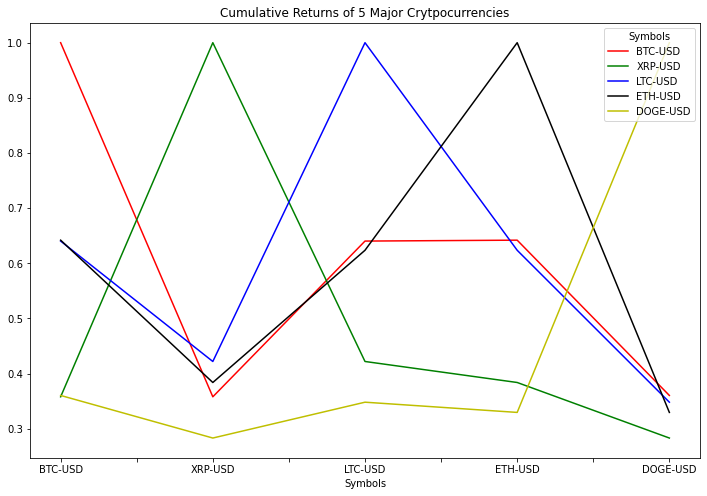

In [88]:
colors = ['r','g','b','k','y']
daily_return.corr().plot(color = colors, figsize = (12,8))
plt.title('Cumulative Returns of 5 Major Crytpocurrencies')
plt.show()

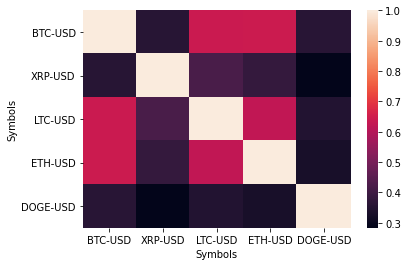

In [89]:
#Build heatmap to show the correlational data more easily.
sns.heatmap(daily_return.corr())
plt.show()

# Check Point 4: Check Points 2, 3, and Extra Analysis

**This graph below subplots how the adj closing prices of each crypto over time to show where in history was each one at its peak. It also shows the general trend in where each crypto is heading.**

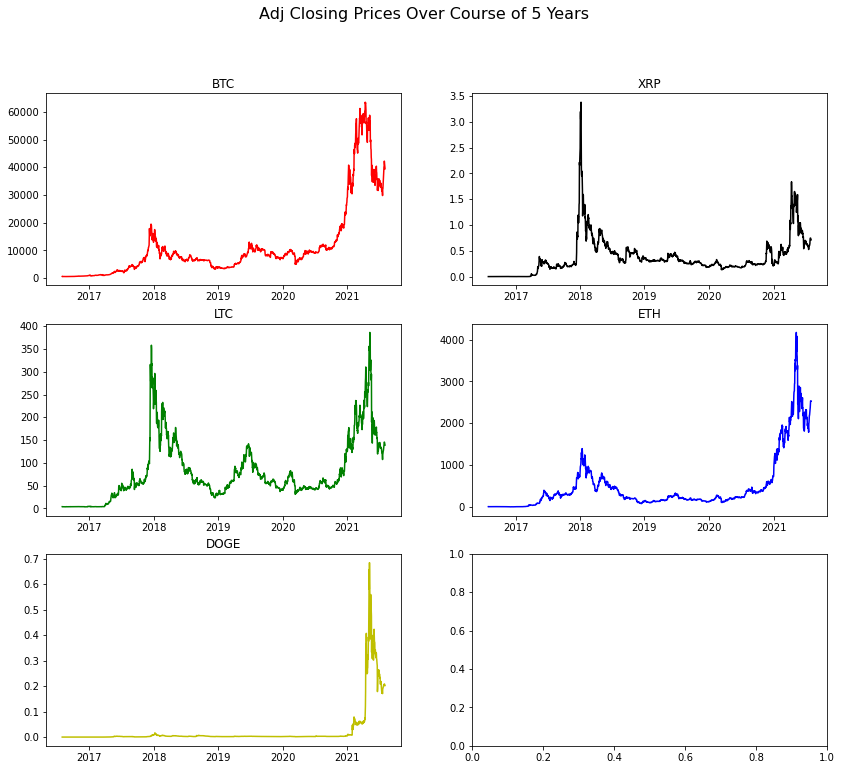

In [90]:
fig,axs = plt.subplots(3,2,figsize=(14,12), gridspec_kw={'hspace':0.2, 'wspace':0.2})
axs[0,0].plot(df['BTC-USD'], c = 'r')
axs[0,0].set_title('BTC')
axs[0,1].plot(df['XRP-USD'], c = 'k')
axs[0,1].set_title('XRP')
axs[1,0].plot(df['LTC-USD'], c = 'g')
axs[1,0].set_title('LTC')
axs[1,1].plot(df['ETH-USD'], c = 'b')
axs[1,1].set_title('ETH')
axs[2,0].plot(df['DOGE-USD'], c = 'y')
axs[2,0].set_title('DOGE')
fig.suptitle('Adj Closing Prices Over Course of 5 Years', fontsize=16)
plt.show()

**This graph below subplots the daily volatilities of each crypto over time to which one is the most stable over the course of 5 years. The less spikes, the more stable crypto.**

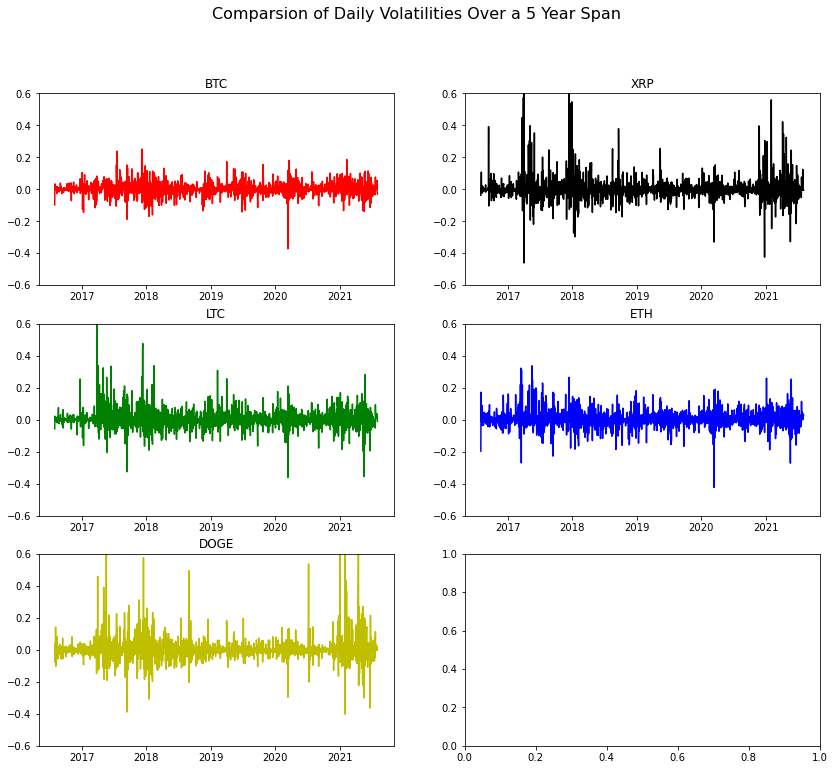

In [11]:
fig,axs = plt.subplots(3,2,figsize=(14,12), gridspec_kw={'hspace':0.2, 'wspace':0.2})
# Set the ylimit for each subplot so that way the comparison is more easily measurable.
axs[0,0].plot(daily_return['BTC-USD'], c = 'r')
axs[0,0].set_title('BTC')
axs[0,0].set_ylim([-0.6,0.6])
axs[0,1].plot(daily_return['XRP-USD'], c = 'k')
axs[0,1].set_title('XRP')
axs[0,1].set_ylim([-0.6,0.6])
axs[1,0].plot(daily_return['LTC-USD'], c = 'g')
axs[1,0].set_title('LTC')
axs[1,0].set_ylim([-0.6,0.6])
axs[1,1].plot(daily_return['ETH-USD'], c = 'b')
axs[1,1].set_title('ETH')
axs[1,1].set_ylim([-0.6,0.6])
axs[2,0].plot(daily_return['DOGE-USD'], c = 'y')
axs[2,0].set_title('DOGE')
axs[2,0].set_ylim([-0.6,0.6])
fig.suptitle('Comparsion of Daily Volatilities Over a 5 Year Span', fontsize=16)
plt.show()

**The shows how the distribution of the 5 major cryptocurrencies' daily returns with the -40% to +40% range, it shows how skewed the data might be for the returns.**

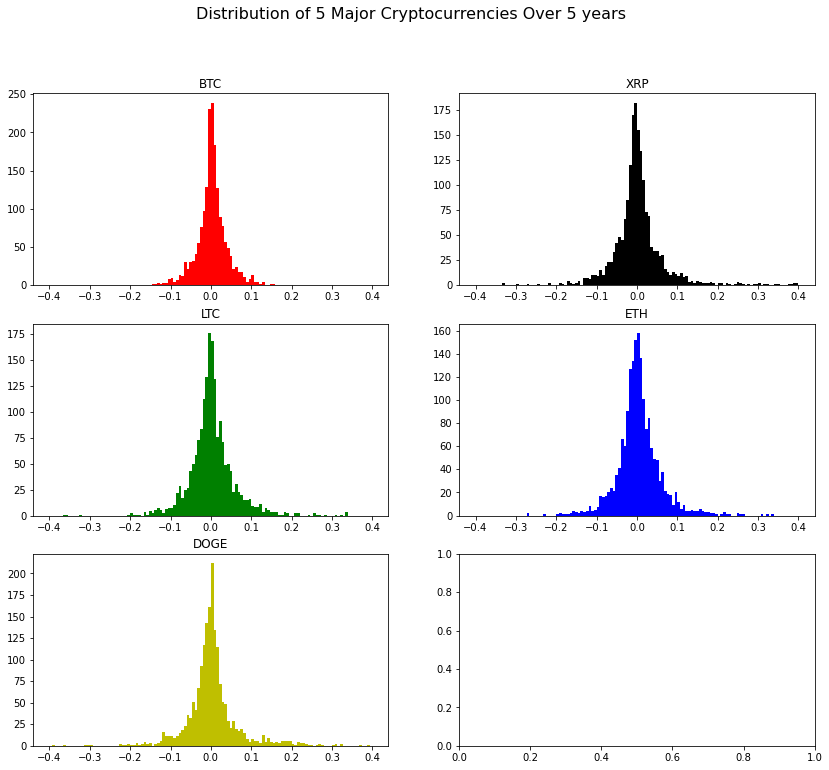

In [12]:
fig,axs = plt.subplots(3,2,figsize=(14,12), gridspec_kw={'hspace':0.2, 'wspace':0.2})
#Place the range between -0.4, and 04 so that way the returns are easily 
#comparable and do not hold too many extermities in returns
axs[0,0].hist(daily_return['BTC-USD'], bins = 120, color = 'r', range = (-0.4, 0.4)) 
axs[0,0].set_title('BTC')
axs[0,1].hist(daily_return['XRP-USD'], bins = 120,  color = 'k', range = (-0.4, 0.4))
axs[0,1].set_title('XRP')
axs[1,0].hist(daily_return['LTC-USD'], bins = 120, color = 'g', range = (-0.4, 0.4))
axs[1,0].set_title('LTC')
axs[1,1].hist(daily_return['ETH-USD'], bins = 120, color = 'b', range = (-0.4, 0.4))
axs[1,1].set_title('ETH')
axs[2,0].hist(daily_return['DOGE-USD'], bins = 120, color = 'y', range = (-0.4, 0.4))
axs[2,0].set_title('DOGE')
fig.suptitle('Distribution of 5 Major Cryptocurrencies Over 5 years', fontsize=16)
plt.show()


**Shows how much extermes and outliers there are in the data set. The second plot shows the egneric statistical distribution such as the mean,q1,q2,q3, etc. The outliers show how much which crypto is more likely to face major discrepancies in prices, such as XRP and DOGE.**

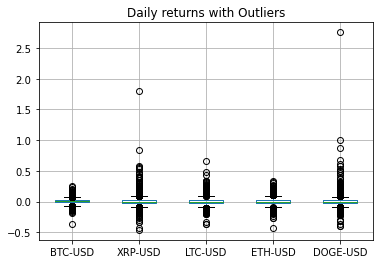

In [13]:
daily_return.boxplot()
plt.title('Daily returns with Outliers')
plt.show()

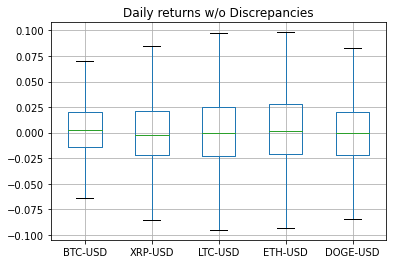

In [14]:
#Remove the outliers to visualize the basic statistics of each crypto more easily
daily_return.boxplot(showfliers = False)
plt.title('Daily returns w/o Discrepancies')
plt.show()